In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import codecs
warnings.filterwarnings('ignore')
from datetime import datetime

## Application Data

In [2]:
df=pd.read_csv(r'E:\Data Science\Upgrad\Airbnb\AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Data Cleaning

### % of Null values in Columns

In [3]:
(df.isnull().sum()/df.shape[0])*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

#### Maximum null values are just 20% in two columns. So, column deletion is not required.

### Data Structure

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Converting last_review 'object' data type  to 'date' data type

In [5]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

### Imputing Null Values in df

In [7]:
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['host_name'] = df['host_name'].fillna('Not Known')
df['name'] = df['name'].fillna('Not Known')

In [9]:
df.isnull().sum().sort_values(ascending=False)

last_review                       10052
id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Didn't impute last_review, as it has date value in it

## Data Analysis

### How are the property listings distributed over neighborhood group

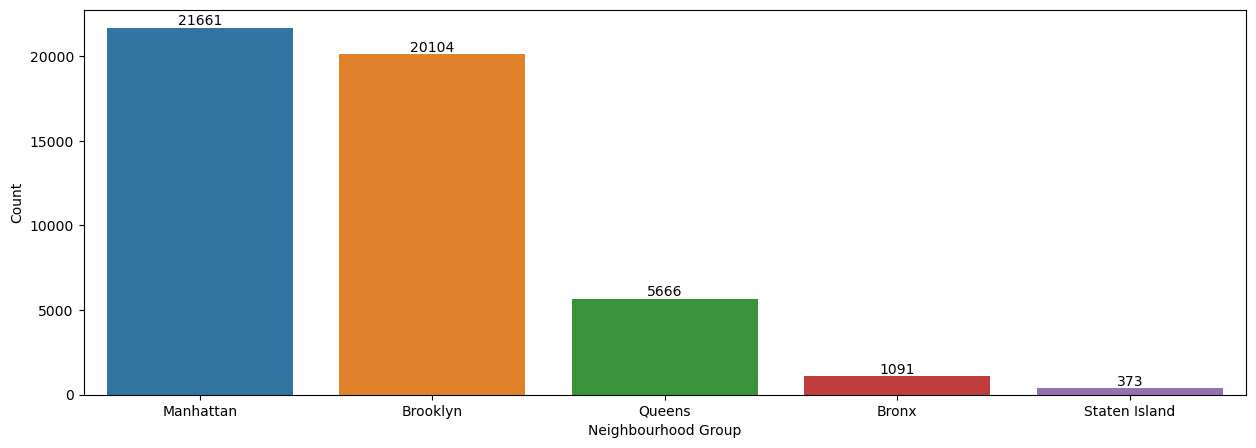

In [10]:
neighbr = df['neighbourhood_group'].value_counts().reset_index()
neighbr.columns = ['neighbourhood_group', 'Count']
neighbr = neighbr.sort_values(by='Count', ascending=False)
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=neighbr, x='neighbourhood_group', y='Count', ci=None, order=neighbr['neighbourhood_group'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
ax.set(xlabel='Neighbourhood Group', ylabel='Count')
plt.show()

In [11]:
#### Its evident that Manhattan has highest number of Neighbourhood, followed by Brooklyn.

### Customer preference over locations

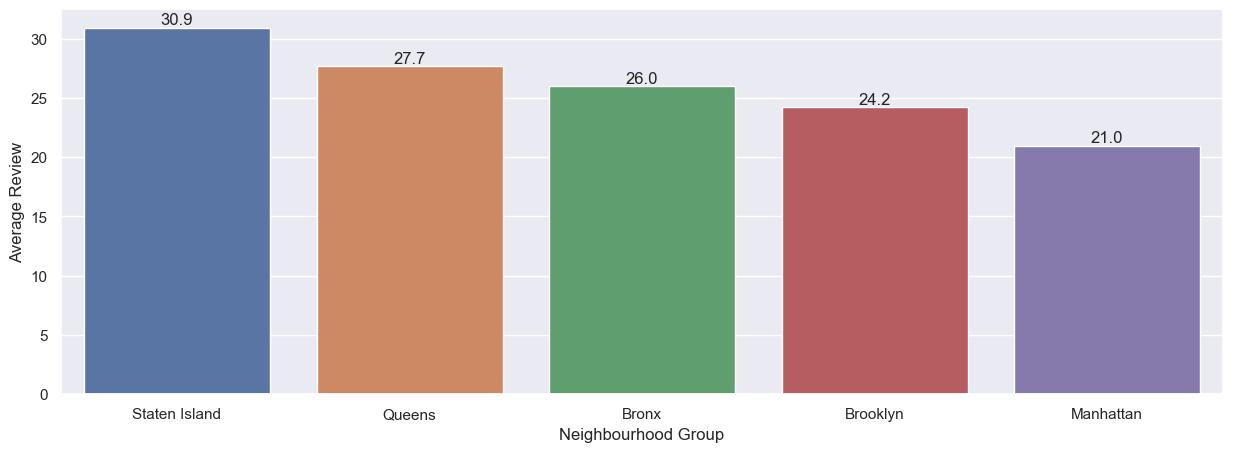

In [12]:
neigh_rev=df.groupby(['neighbourhood_group'], as_index=False)['number_of_reviews'].mean().sort_values(by='number_of_reviews', ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(data=neigh_rev, x='neighbourhood_group', y='number_of_reviews')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f')
    ax.set(xlabel='Neighbourhood Group', ylabel='Average Review')

In [13]:
#### Staten Island (Neighbourhood Group) has received highest average review which indicates greater customer engagement and interest shown.

### Property listings distributed over Room Type

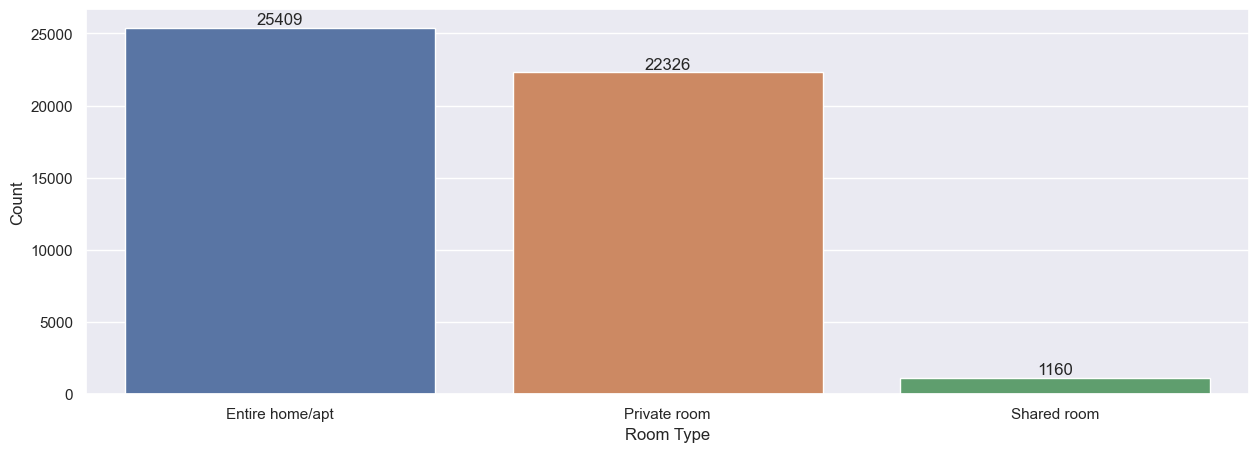

In [14]:
rooms = df['room_type'].value_counts().reset_index()
rooms.columns = ['room_type', 'Count']
rooms = rooms.sort_values(by='Count', ascending=False)
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=rooms, x='room_type', y='Count', ci=None, order=rooms['room_type'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
ax.set(xlabel='Room Type', ylabel='Count')
plt.show()

In [15]:
#### Entire home/apt has the highest number of listings, followed by Private roomand Shared room

### Customer perference over type of properties

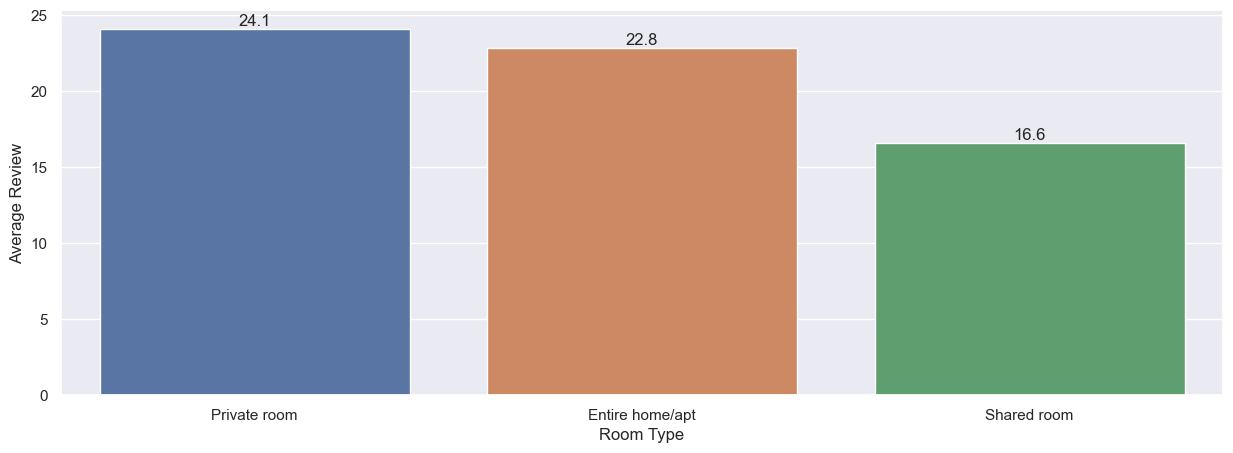

In [16]:
room_rev=df.groupby(['room_type'], as_index=False)['number_of_reviews'].mean().sort_values(by='number_of_reviews',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(data=room_rev,x='room_type', y='number_of_reviews')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f')
    ax.set(xlabel='Room Type', ylabel='Average Review')

In [17]:
#### Despite having highest listing of "Entire home/apt", customers are interested in Private rooms the most

### Preference for a specific type of property distributed over neighborhood group

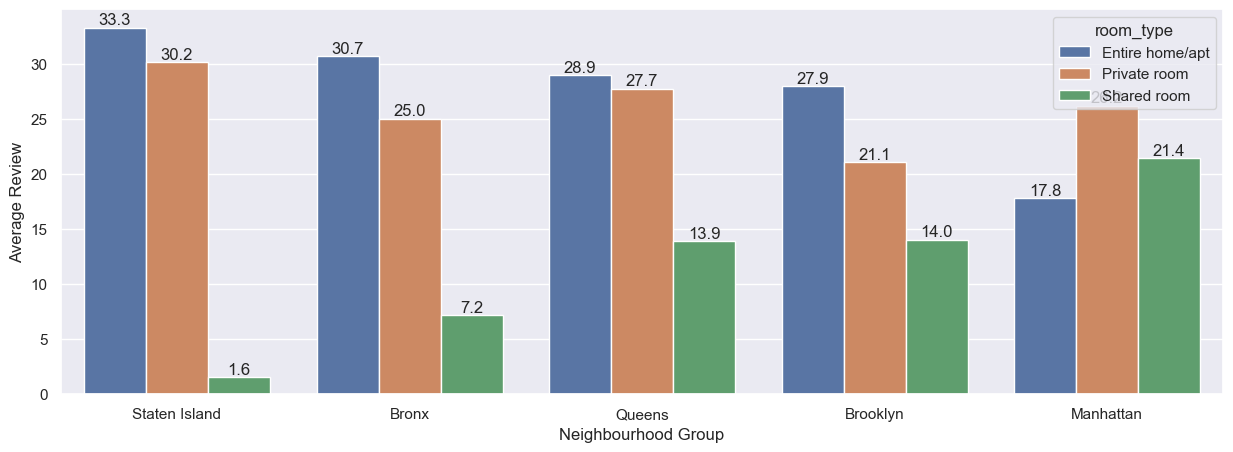

In [18]:
neigh_pro=df.groupby(['neighbourhood_group','room_type'], as_index=False)['number_of_reviews'].mean().sort_values(by='number_of_reviews',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(data=neigh_pro, x='neighbourhood_group', y='number_of_reviews', hue='room_type')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f')
    ax.set(xlabel='Neighbourhood Group', ylabel='Average Review')

In [19]:
#### Staten Island received most of the reviews for Entire home/apt.
#### The property type preference over the five neighbourhood groups, it can be seen that there are similar trend for the
#### properties where Shared Room received less reviews than Private Room and then Entire home/apt.
#### Manhattan on the other hand received most review for Private Room, then Shared room and by Entire home/apt.
#### Observed a trend of receiving most reviews for Entire home/apt, then Private room and by Shared room.
#### On the other hand Manhattan's propery received most reviews for Private room, then Shared room and by Entire home/apt.
#### Entire home/apt has received most reviews for all Neighbourhoods other than Manhattan.

### Cost distribution over neighbourhood group

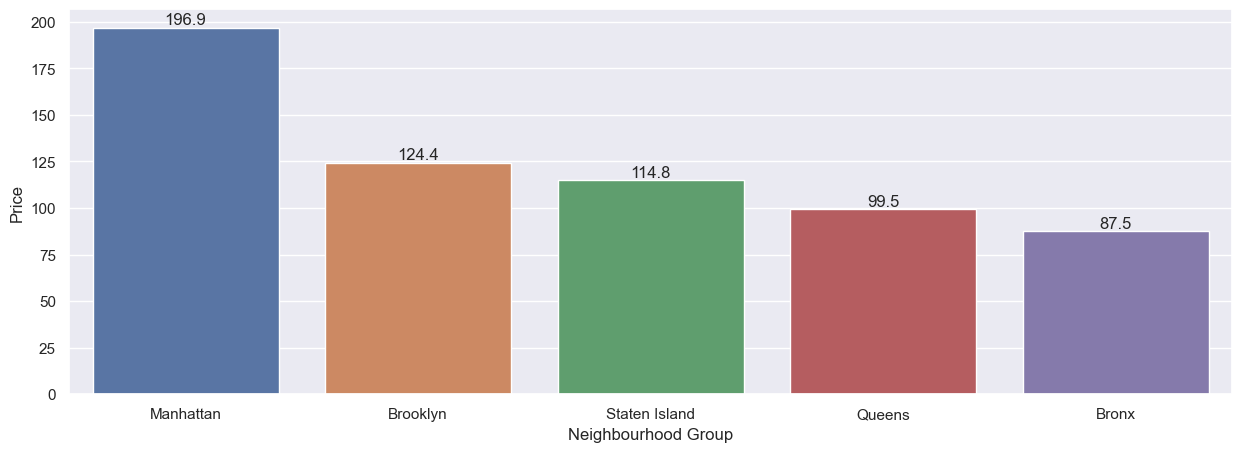

In [20]:
cost_dist=df.groupby(['neighbourhood_group'], as_index=False)['price'].mean().sort_values(by='price',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(data=cost_dist, x='neighbourhood_group', y='price')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f')
    ax.set(xlabel='Neighbourhood Group', ylabel='Price')

In [21]:
#### In Manhattan the cost is high and the cost is low in Bronx.
#### Private room and Shared room are in more demand in Manhattan over Entire home/app as the average price is high.
#### Entire home/app are in more demand in Brooklyn, Staten Island, Queens and Bronx as these neighbourhoods are not as expensive as Manhattan.

### Insight drawn over distribution of prices

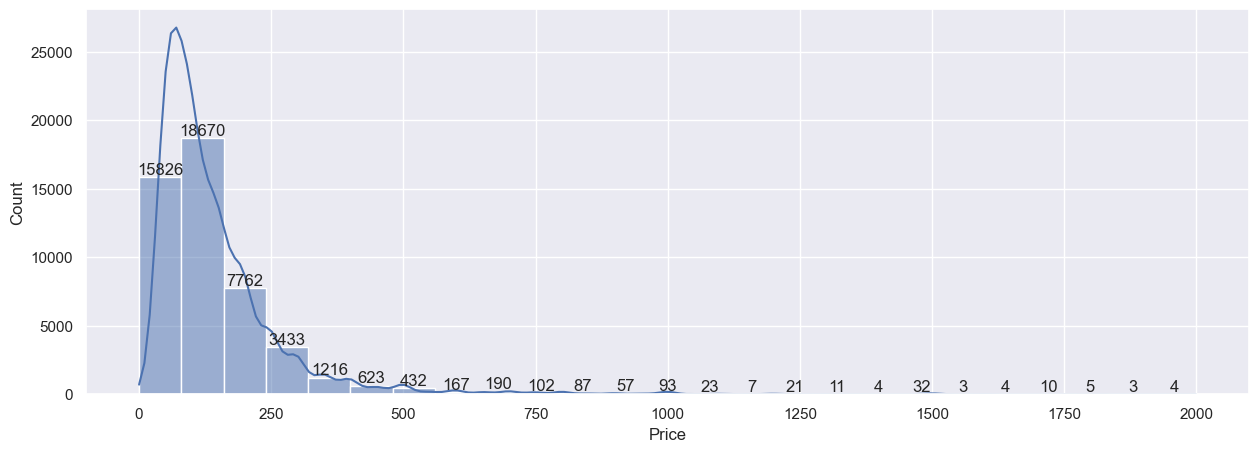

In [22]:
price_dist = df[df['price']<2000]['price']
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.histplot(price_dist, bins=25, kde=True)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f')
    ax.set(xlabel='Price', ylabel='Count')
plt.show()

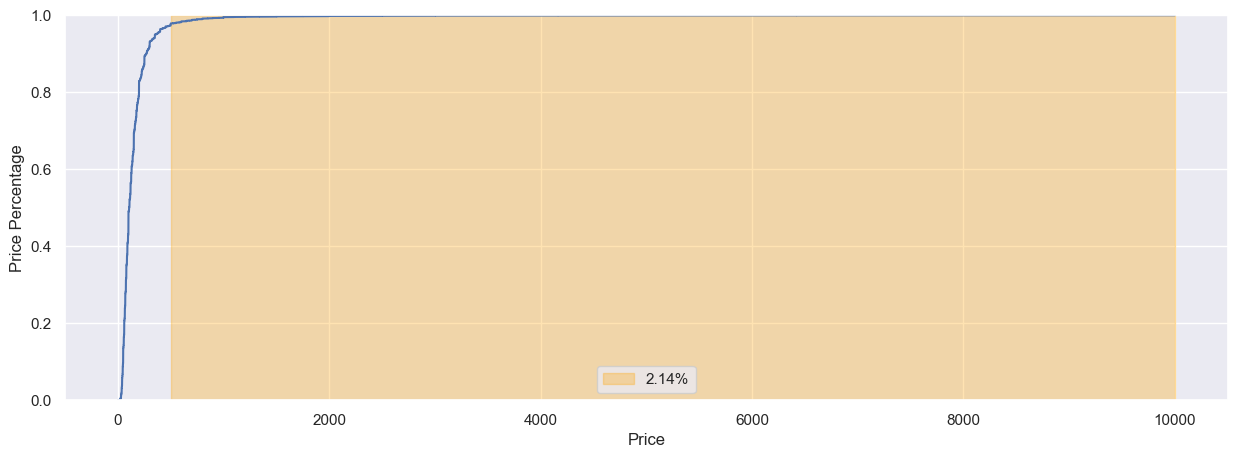

In [23]:
price_dist = df['price']
sns.ecdfplot(price_dist)
plt.xlabel('Price')
plt.ylabel('Price Percentage')
lower_range = 501
upper_range = max(df['price'])
percentage_within_range = sum(1 for price in price_dist if lower_range <= price <= upper_range) / len(price_dist) * 100
plt.axvspan(lower_range, upper_range, color='orange', alpha=0.3, label=f'{percentage_within_range:.2f}%')
plt.legend()
plt.show()

In [24]:
#### Majority of the room prices are less than $250.
#### 89.35% of rooms fall under $(0-250) range.
#### 8.52% of rooms fall under $(250-500) range.
#### 2.14% of rooms fall under $(>500) range.

### Minimum night stay distribution over Room Type

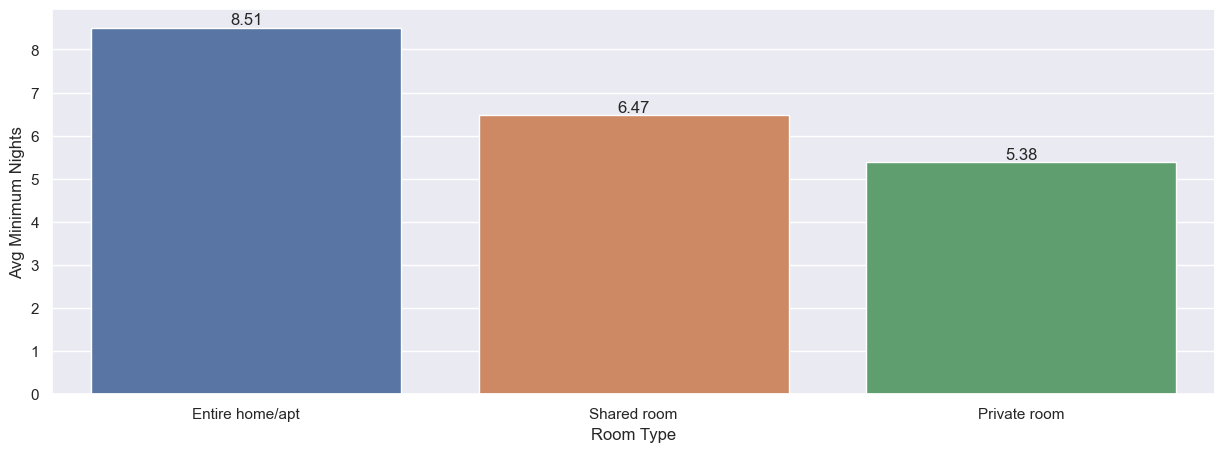

In [25]:
room_night=df.groupby(['room_type'], as_index=False)['minimum_nights'].mean().sort_values(by='minimum_nights',ascending=False)
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.barplot(data=room_night, x='room_type', y='minimum_nights')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f')
    ax.set(xlabel='Room Type', ylabel='Avg Minimum Nights')

In [26]:
#### Entire home/apt hosts a minimmum of 8.51 average days as compared to Shared room and Private room.

### Effect on minimum night stay over customer preference

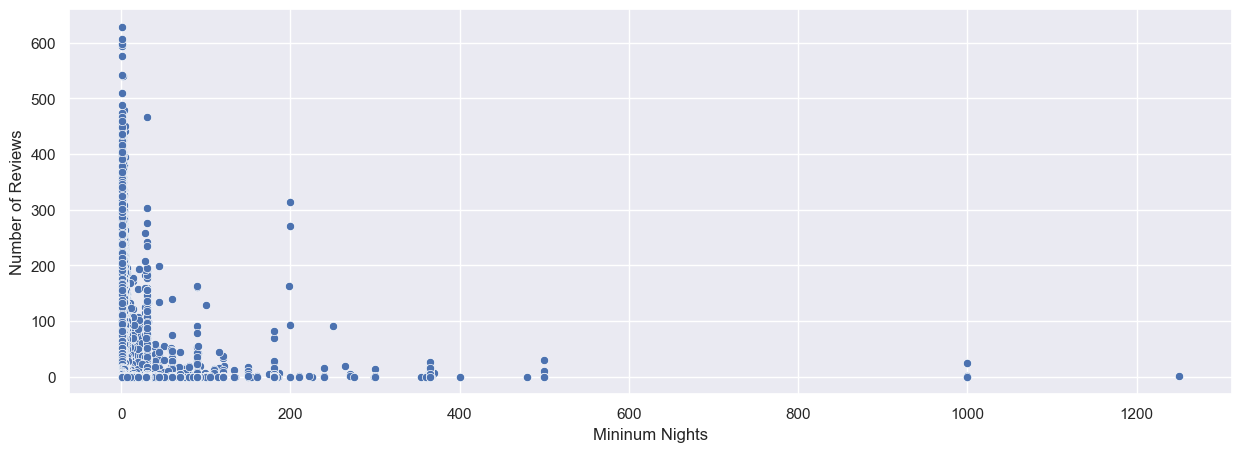

In [27]:
Min_Nights = df['minimum_nights']
Reviews = df['number_of_reviews']
sns.set(rc={'figure.figsize':(15,5)})
sns.scatterplot(x=Min_Nights, y=Reviews)
plt.xlabel('Mininum Nights')
plt.ylabel('Number of Reviews')
plt.show()

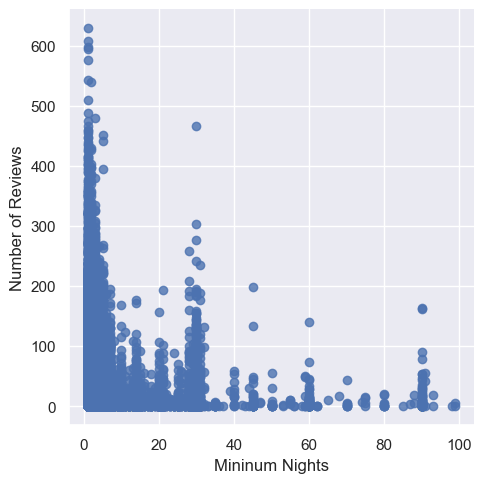

In [28]:
Min_Nights = df[df['minimum_nights']<100]
sns.set(rc={'figure.figsize':(15,5)})
sns.lmplot(data=Min_Nights, x='minimum_nights', y='number_of_reviews', fit_reg=False)
plt.xlabel('Mininum Nights')
plt.ylabel('Number of Reviews')
plt.show()

In [29]:
#### It's observed that more reviews received when number of nights are less.